<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/%EC%9E%A0%EA%B9%90%ED%82%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 데이터 가져오기

In [4]:
from google.colab import files
import io
data = files.upload()

Saving result.csv to result.csv


In [5]:
df = pd.read_csv('result.csv')

In [6]:
df

,Unnamed: 0,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito_Value
0,0,2021-09-27,21.6,18.7,25.0,0.0,2.4,52,66.0,2.2,21.6,16.1,0.0,63.1
1,1,2021-09-26,22.6,18.4,27.3,0.0,2.3,50,63.0,8.3,23.9,14.6,0.0,70.2
2,2,2021-09-25,21.2,18.7,23.1,0.0,2.3,66,72.6,0.0,21.1,14.3,0.0,70.5
3,3,2021-09-24,21.8,16.7,26.9,0.0,2.2,46,67.5,9.9,23.1,12.1,0.0,70.5
4,4,2021-09-23,20.9,16.9,25.9,0.0,2.4,48,67.3,8.0,22.7,11.9,0.0,63.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1065,2016-05-05,18.9,10.2,26.9,7.5,1.7,17,50.8,10.9,20.0,3.6,17.0,24.4
1034,1066,2016-05-04,15.7,10.2,20.6,0.0,5.1,28,46.6,12.8,16.6,8.9,0.0,25.6
1035,1067,2016-05-03,12.9,8.9,17.6,27.0,4.9,72,86.1,0.0,14.8,8.5,27.0,30.4
1036,1068,2016-05-02,21.1,16.5,28.4,16.5,2.2,33,64.5,7.5,24.4,12.1,43.5,27.4


#### 데이터 랜덤 배치

In [7]:
train=df.sample(frac=0.8)
test=df.sample(frac=0.2)

In [9]:
train

,Unnamed: 0,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito_Value
68,68,2021-07-21,30.5,25.3,35.3,0.0,1.7,40,64.0,11.3,30.5,22.0,0.0,68.5
114,114,2021-06-05,20.8,17.0,25.7,0.0,3.3,40,68.1,8.4,22.2,13.6,0.0,56.0
211,211,2020-08-31,26.4,23.8,30.0,0.0,2.8,67,77.9,1.9,27.2,21.9,0.0,87.3
467,475,2019-06-12,21.5,16.1,26.4,0.0,1.8,40,57.1,13.0,24.4,11.7,0.0,34.1
535,559,2018-09-20,19.0,17.8,20.1,5.0,1.8,57,82.4,0.0,19.8,16.8,29.5,51.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,1067,2016-05-03,12.9,8.9,17.6,27.0,4.9,72,86.1,0.0,14.8,8.5,27.0,30.4
670,696,2018-05-06,16.6,15.0,20.7,22.0,1.1,60,86.4,3.2,17.2,11.7,22.0,3.2
872,903,2016-10-14,16.7,10.5,23.5,0.0,1.3,39,61.8,8.5,17.2,7.1,0.0,18.6
7,7,2021-09-20,23.7,19.0,28.4,0.0,2.7,48,63.6,10.3,29.0,14.1,0.0,74.5


In [10]:
test

,Unnamed: 0,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito_Value
348,348,2019-10-17,15.4,11.2,21.6,0.0,1.7,31,56.0,7.4,17.2,6.4,0.0,11.1
766,797,2017-07-28,25.5,24.8,26.9,8.5,1.5,86,92.1,0.0,25.9,23.9,8.5,100.0
237,237,2020-08-05,26.5,25.5,29.1,18.5,1.9,81,92.1,0.1,26.7,24.3,94.2,75.6
795,826,2017-06-29,26.2,21.9,31.5,0.0,2.2,40,64.8,9.5,29.5,19.8,0.0,100.0
998,1030,2016-06-09,24.1,17.8,31.3,0.0,2.0,31,59.5,12.4,32.8,14.8,0.0,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,377,2019-09-18,21.0,16.0,25.4,0.0,3.1,27,46.0,11.7,25.4,9.4,0.0,52.2
843,874,2017-05-12,19.1,16.8,21.1,0.0,2.1,63,71.6,0.0,17.6,11.1,0.0,17.4
895,926,2016-09-21,20.2,14.3,25.3,0.0,2.0,28,43.4,10.8,22.9,10.8,0.0,62.4
281,281,2020-06-22,28.6,21.7,35.4,0.0,2.0,26,50.5,13.3,36.3,16.1,0.0,75.2


In [11]:
train_data_set = train.values
X_train = train_data_set[:, 2:-1].astype(float)
Y_train = train_data_set[:, -1].astype(float)

In [12]:
test_data_set = test.values
X_test = test_data_set[:, 2:-1].astype(float)
Y_test = test_data_set[:, -1].astype(float)

In [84]:
from sklearn.preprocessing import MinMaxScaler

# 변형 객체 생성
minmax_scaler = MinMaxScaler()

# 훈련데이터의 모수 분포 저장
minmax_scaler.fit(X_train)

# 훈련 데이터 스케일링
X_train_scaled = minmax_scaler.transform(X_train)

# 테스트 데이터의 스케일링
X_test_scaled = minmax_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = minmax_scaler.inverse_transform(X_train_scaled)

### 모델 구성

830


In [103]:
from keras import optimizers
model = Sequential()
#model.add(Dense(1, input_shape(11,), activation='relu'))

model.add(Dense(1024, activation='relu', input_shape=(11,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1))

### 모델 학습과정 설정

In [104]:
#model.compile(loss='mse', optimizer='adam',metrics='accuracy')
#model.compile(loss='mse', optimizer='adam',metrics=['mae'])

optimizer = tensorflow.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

### 모델 학습

In [105]:
#hist=model.fit(X_train, Y_train, epochs=10000, batch_size=32)

hist=model.fit(X_train_scaled, Y_train, epochs=1000, validation_split = 0.2)

Epoch 1/1000
21/21 [==============================] - 1s 18ms/step - loss: 1483.8693 - mae: 31.1292 - mse: 1483.8693 - val_loss: 447.5182 - val_mae: 17.5543 - val_mse: 447.5182
Epoch 2/1000
21/21 [==============================] - 0s 12ms/step - loss: 549.2853 - mae: 19.1693 - mse: 549.2853 - val_loss: 471.1137 - val_mae: 18.2809 - val_mse: 471.1137
Epoch 3/1000
21/21 [==============================] - 0s 12ms/step - loss: 526.6556 - mae: 18.5820 - mse: 526.6556 - val_loss: 426.6891 - val_mae: 17.0524 - val_mse: 426.6891
Epoch 4/1000
21/21 [==============================] - 0s 12ms/step - loss: 512.0247 - mae: 18.2133 - mse: 512.0247 - val_loss: 419.4064 - val_mae: 16.6496 - val_mse: 419.4065
Epoch 5/1000
21/21 [==============================] - 0s 13ms/step - loss: 504.7234 - mae: 18.2347 - mse: 504.7234 - val_loss: 425.4137 - val_mae: 16.5622 - val_mse: 425.4137
Epoch 6/1000
21/21 [==============================] - 0s 13ms/step - loss: 508.1730 - mae: 18.0679 - mse: 508.1730 - val_lo

### 학습과정 살펴보기



In [98]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[1418.87744140625, 542.9306030273438, 525.498779296875, 512.2913818359375, 509.43560791015625, 503.627197265625, 500.81890869140625, 490.3113098144531, 499.6619873046875, 495.5348205566406, 489.34149169921875, 498.63134765625, 497.2389831542969, 477.307373046875, 488.6448669433594, 487.55072021484375, 489.81890869140625, 484.95709228515625, 487.5048522949219, 475.0035400390625, 469.1284484863281, 482.96075439453125, 480.0603332519531, 475.0652770996094, 478.0733337402344, 473.30780029296875, 483.8857421875, 474.2807922363281, 471.2077331542969, 478.67047119140625, 469.3587646484375, 471.4645080566406, 472.03265380859375, 459.77923583984375, 468.8406066894531, 472.23089599609375, 464.4540100097656, 467.3606872558594, 470.8191833496094, 458.78387451171875, 453.8078918457031, 456.734375, 457.26171875, 455.2416687011719, 467.1630859375, 453.85870361328125, 459.5056457519531, 453.72259521484375, 461.41717529296875, 457.6518859863281, 461.2817077636719, 459.786865

### 모델 평가하기

In [100]:
loss_and_metrics = model.evaluate(X_test_scaled, Y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 3ms/step - loss: 303.4393 - mae: 12.0357 - mse: 303.4393
## evaluation loss and_metrics ##
[303.43927001953125, 12.03567123413086, 303.43927001953125]


# 모델 사용하기


In [101]:
# 이건 아직 불확실해요!!
xhat = X_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[-239.89563]]


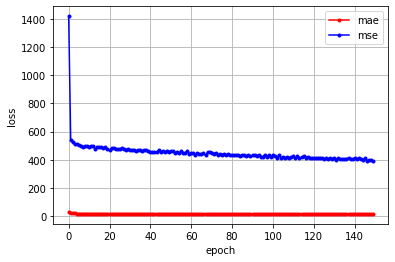

In [102]:
import matplotlib.pyplot as plt

y_acc = hist.history['mae']
y_loss = hist.history['loss']

#x_len = np.arange(len(y_loss)) 
x_len = np.arange(150)
plt.plot(x_len, y_acc[:150], marker='.', c='red', label="mae")
plt.plot(x_len, y_loss[:150], marker='.', c='blue', label="mse")


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()